<b>Вариант 15</b>

Тип сериализации: JSON

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Преобразование строки JSON в объект pandas

In [9]:
data = pd.read_json('var15.jsn')
data

,scvcy,uankt,wxxkv
0,4.500188,15.499231,13.319586
1,9.009138,15.300913,0.018574
2,14.616852,8.368659,12.921245
3,7.105904,15.053140,19.776153
4,12.196796,16.038362,19.157418
...,...,...,...
95,13.345560,21.844748,12.098593
96,3.465517,14.090910,15.965171
97,13.980700,16.782747,-95.954213
98,15.501162,19.276040,11.613346


<b>Нахождение среднего каждого столбца:</b>

In [11]:
print("Среднее scvcy: ")
print(data['scvcy'].mean())
print("Среднее uankt: ")
print(data['uankt'].mean())
print("Среднее wxxkv: ")
print(data['wxxkv'].mean())

Среднее scvcy: 
10.878160426845879
Среднее uankt: 
11.883866738953364
Среднее wxxkv: 
11.205791712059094


<b>Нахождение дисперсии каждого столбца:</b>

In [12]:
print("Дисперсия scvcy: ")
print(data['scvcy'].var())
print("Дисперсия uankt: ")
print(data['uankt'].var())
print("Дисперсия wxxkv: ")
print(data['wxxkv'].var())

Дисперсия scvcy: 
20.873659765739074
Дисперсия uankt: 
637.7307400685995
Дисперсия wxxkv: 
624.1767760962339


<b>Визуализация:</b>

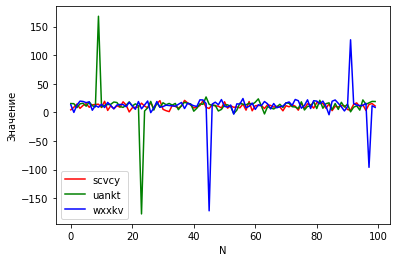

In [19]:
scvcy=data['scvcy']
uankt=data['uankt']
wxxkv=data['wxxkv']

plt.plot(scvcy, color='r', label='scvcy')
plt.plot(uankt, color='g', label='uankt')
plt.plot(wxxkv, color='b', label='wxxkv')
plt.xlabel('N')
plt.ylabel('Значение')
plt.legend()

<b>Построение графиков для каждой пары признаков в наборе данных:</b>

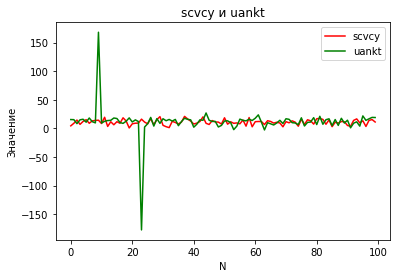

In [23]:
plt.plot(scvcy, color='r', label='scvcy')
plt.plot(uankt, color='g', label='uankt')
plt.title('scvcy и uankt')
plt.xlabel('N')
plt.ylabel('Значение')
plt.legend()

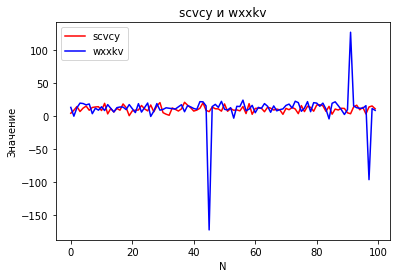

In [24]:
plt.plot(scvcy, color='r', label='scvcy')
plt.plot(wxxkv, color='b', label='wxxkv')
plt.title('scvcy и wxxkv')
plt.xlabel('N')
plt.ylabel('Значение')
plt.legend()

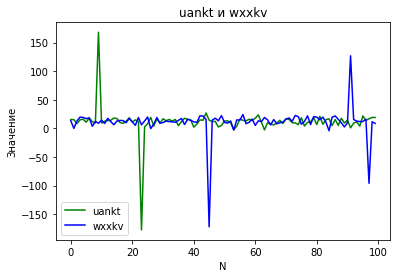

In [25]:
plt.plot(uankt, color='g', label='uankt')
plt.plot(wxxkv, color='b', label='wxxkv')
plt.title('uankt и wxxkv')
plt.xlabel('N')
plt.ylabel('Значение')
plt.legend()

<b>Построение гистограммы каждого из признаков:</b>

No handles with labels found to put in legend.


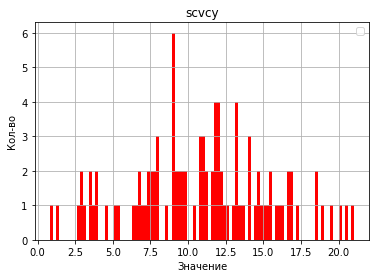

In [50]:
n_bins = len(data)
scvcy.hist(bins=n_bins, color='r')
plt.title('scvcy')
plt.xlabel('Значение')
plt.ylabel('Кол-во')
plt.legend()

No handles with labels found to put in legend.


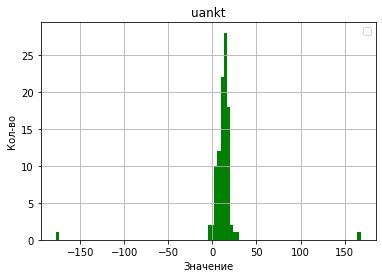

In [58]:
uankt.hist(bins=n_bins, color='g')
plt.title('uankt')
plt.xlabel('Значение')
plt.ylabel('Кол-во')
plt.legend()

No handles with labels found to put in legend.


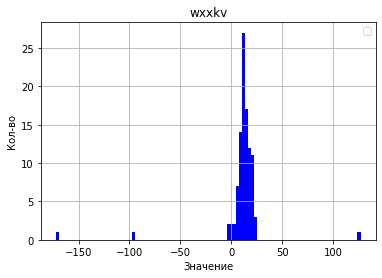

In [52]:
wxxkv.hist(bins=n_bins, color='b')
plt.title('wxxkv')
plt.xlabel('Значение')
plt.ylabel('Кол-во')
plt.legend()

<b>Нахождение выбросов:</b>

Считаем, что если какая-либо точка данных более чем в 3 раза превышает стандартное отклонение, то эта точка, скорее всего, будет выбросом.

Заменяем выброс на среднее значение.

In [86]:
def find_anomalies(data):
    std = data.std()
    mean = data.mean()
    off = std * 3
    
    lower_limit  = mean - off 
    upper_limit = mean + off

    for out in data:
        if out > upper_limit or out < lower_limit:
            data[data == out] = mean
    return data

scvcy2=find_anomalies(data['scvcy'])
uankt2=find_anomalies(data['uankt'])
wxxkv2=find_anomalies(data['wxxkv'])

Строим график для сравнения:

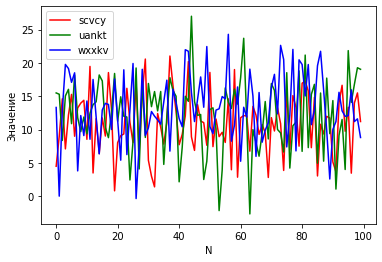

In [87]:
plt.plot(scvcy2, color='r', label='scvcy')
plt.plot(uankt2, color='g', label='uankt')
plt.plot(wxxkv2, color='b', label='wxxkv')
plt.xlabel('N')
plt.ylabel('Значение')
plt.legend()

В сравнении с первым графиком, у этого графика более равномерные значения. Значит, выбросы найдены правильно.

<b>Новые средние и дисперсии:</b>

In [91]:
print("Новое среднее scvcy: ")
print(scvcy2.mean())
print("Новое среднее uankt: ")
print(uankt2.mean())
print("Новое среднее wxxkv: ")
print(wxxkv2.mean())

Новое среднее scvcy: 
10.878160426845879
Новое среднее uankt: 
12.214471743143779
Новое среднее wxxkv: 
13.282099885243264


In [92]:
print("Новоя дисперсия scvcy: ")
print(scvcy2.var())
print("Новоя дисперсия uankt: ")
print(uankt2.var())
print("Новоя дисперсия wxxkv: ")
print(wxxkv2.var())

Новоя дисперсия scvcy: 
20.873659765739074
Новоя дисперсия uankt: 
29.42763007725577
Новоя дисперсия wxxkv: 
25.446160603316358


В сравнении с первоначальными значениями, дисперсия стала намного ниже, что говорит о том, что  разброс данных вокруг средней арифметической стал ниже.

<b>Нормализация данных по среднему и дисперсии:</b>

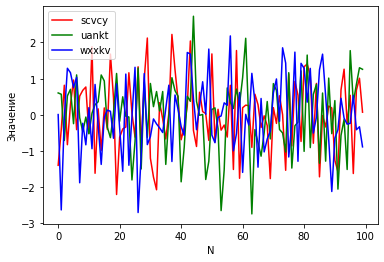

In [95]:
norm_scvcy = (scvcy2 - scvcy2.mean()) /  scvcy2.std()
norm_uankt = (uankt2 - uankt2.mean()) /  uankt2.std()
norm_wxxkv = (wxxkv2 - wxxkv2.mean()) /  wxxkv2.std()

plt.plot(norm_scvcy, color='r', label='scvcy')
plt.plot(norm_uankt, color='g', label='uankt')
plt.plot(norm_wxxkv, color='b', label='wxxkv')
plt.xlabel('N')
plt.ylabel('Значение')
plt.legend()

In [97]:
print("Среднее norm_scvcy")
print(norm_scvcy.mean())
print("Среднее norm_uankt")
print(norm_uankt.mean())
print("Среднее norm_wxxkv")
print(norm_wxxkv.mean())

Среднее norm_scvcy
4.017619570362285e-16
Среднее norm_uankt
-4.951594689828198e-16
Среднее norm_wxxkv
-2.042810365310288e-16


In [98]:
print("Дисперсия norm_scvcy")
print(norm_scvcy.var())
print("Дисперсия norm_uankt")
print(norm_uankt.var())
print("Дисперсия norm_wxxkv")
print(norm_wxxkv.var())

Дисперсия norm_scvcy
1.0000000000000002
Дисперсия norm_uankt
1.0000000000000002
Дисперсия norm_wxxkv
1.0
